In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
animals_slaughtered = pd.read_csv('../data/animals-slaughtered-for-meat.csv')

In [3]:
global_production = pd.read_csv('../data/global-meat-production-by-livestock-type.csv')

In [4]:
animals_slaughtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13853 entries, 0 to 13852
Data columns (total 9 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Entity                                                                                    13853 non-null  object 
 1   Code                                                                                      11274 non-null  object 
 2   Year                                                                                      13853 non-null  int64  
 3   Meat, cattle | 00000867 || Producing or slaughtered animals | 005320 || animals           13583 non-null  float64
 4   Meat, goat | 00001017 || Producing or slaughtered animals | 005320 || animals             12387 non-null  float64
 5   Meat, chicken | 00001058 || Producing or slaughtered a

In [5]:
animals_slaughtered.isna().sum()

Entity                                                                                         0
Code                                                                                        2579
Year                                                                                           0
Meat, cattle | 00000867 || Producing or slaughtered animals | 005320 || animals              270
Meat, goat | 00001017 || Producing or slaughtered animals | 005320 || animals               1466
Meat, chicken | 00001058 || Producing or slaughtered animals | 005321 || animals             124
Meat, turkey | 00001080 || Producing or slaughtered animals | 005321 || animals             7828
Meat, pig | 00001035 || Producing or slaughtered animals | 005320 || animals                1158
Meat, lamb and mutton | 00000977 || Producing or slaughtered animals | 005320 || animals    1139
dtype: int64

In [6]:
animals_slaughtered

,Entity,Code,Year,"Meat, cattle | 00000867 || Producing or slaughtered animals | 005320 || animals","Meat, goat | 00001017 || Producing or slaughtered animals | 005320 || animals","Meat, chicken | 00001058 || Producing or slaughtered animals | 005321 || animals","Meat, turkey | 00001080 || Producing or slaughtered animals | 005321 || animals","Meat, pig | 00001035 || Producing or slaughtered animals | 005320 || animals","Meat, lamb and mutton | 00000977 || Producing or slaughtered animals | 005320 || animals"
0,Afghanistan,AFG,1961,360000.0,940000.0,7000000.0,NaN,NaN,4336000.0
1,Afghanistan,AFG,1962,384000.0,875000.0,7500000.0,NaN,NaN,4355000.0
2,Afghanistan,AFG,1963,396000.0,810000.0,7700000.0,NaN,NaN,4673000.0
3,Afghanistan,AFG,1964,402000.0,750000.0,8000000.0,NaN,NaN,5010000.0
4,Afghanistan,AFG,1965,408000.0,875000.0,8500000.0,NaN,NaN,5179000.0
...,...,...,...,...,...,...,...,...,...
13848,Zimbabwe,ZWE,2016,284689.0,1430664.0,58000000.0,28000.0,420577.0,43166.0
13849,Zimbabwe,ZWE,2017,262990.0,2006078.0,60000000.0,29000.0,211228.0,29918.0
13850,Zimbabwe,ZWE,2018,266228.0,2099581.0,57000000.0,30000.0,174010.0,23767.0
13851,Zimbabwe,ZWE,2019,235027.0,2060377.0,58333000.0,30000.0,193820.0,31884.0


### Renamed columns to simplify

In [7]:
animals_slaughtered=animals_slaughtered.rename(columns={'Meat, cattle | 00000867 || Producing or slaughtered animals | 005320 || animals':'Cattle (beef and buffalo) Meat','Meat, goat | 00001017 || Producing or slaughtered animals | 005320 || animals':'Goat Meat','Meat, chicken | 00001058 || Producing or slaughtered animals | 005321 || animals':'Chicken Meat','Meat, turkey | 00001080 || Producing or slaughtered animals | 005321 || animals':'Turkey Meat','Meat, pig | 00001035 || Producing or slaughtered animals | 005320 || animals':'Pig Meat','Meat, lamb and mutton | 00000977 || Producing or slaughtered animals | 005320 || animals':'Lamb and Mutton Meat'})
animals_slaughtered

,Entity,Code,Year,Cattle (beef and buffalo) Meat,Goat Meat,Chicken Meat,Turkey Meat,Pig Meat,Lamb and Mutton Meat
0,Afghanistan,AFG,1961,360000.0,940000.0,7000000.0,NaN,NaN,4336000.0
1,Afghanistan,AFG,1962,384000.0,875000.0,7500000.0,NaN,NaN,4355000.0
2,Afghanistan,AFG,1963,396000.0,810000.0,7700000.0,NaN,NaN,4673000.0
3,Afghanistan,AFG,1964,402000.0,750000.0,8000000.0,NaN,NaN,5010000.0
4,Afghanistan,AFG,1965,408000.0,875000.0,8500000.0,NaN,NaN,5179000.0
...,...,...,...,...,...,...,...,...,...
13848,Zimbabwe,ZWE,2016,284689.0,1430664.0,58000000.0,28000.0,420577.0,43166.0
13849,Zimbabwe,ZWE,2017,262990.0,2006078.0,60000000.0,29000.0,211228.0,29918.0
13850,Zimbabwe,ZWE,2018,266228.0,2099581.0,57000000.0,30000.0,174010.0,23767.0
13851,Zimbabwe,ZWE,2019,235027.0,2060377.0,58333000.0,30000.0,193820.0,31884.0


### Narrowed down from 1975 to 2016 to match BMI dataframes

In [8]:
mask=(animals_slaughtered['Year']>= 1975)&(animals_slaughtered['Year']<= 2016)
animals_slaughtered=animals_slaughtered[mask]
animals_slaughtered

,Entity,Code,Year,Cattle (beef and buffalo) Meat,Goat Meat,Chicken Meat,Turkey Meat,Pig Meat,Lamb and Mutton Meat
14,Afghanistan,AFG,1975,511500.0,1500000.0,13000000.0,NaN,NaN,6270000.0
15,Afghanistan,AFG,1976,523500.0,1500000.0,13000000.0,NaN,NaN,7800000.0
16,Afghanistan,AFG,1977,541000.0,1020000.0,13500000.0,NaN,NaN,7750000.0
17,Afghanistan,AFG,1978,557000.0,1020000.0,14000000.0,NaN,NaN,8000000.0
18,Afghanistan,AFG,1979,590000.0,1080000.0,15000000.0,NaN,NaN,7750000.0
...,...,...,...,...,...,...,...,...,...
13844,Zimbabwe,ZWE,2012,336151.0,1960000.0,55500000.0,27000.0,362000.0,26800.0
13845,Zimbabwe,ZWE,2013,328594.0,2000000.0,55500000.0,27000.0,370000.0,27000.0
13846,Zimbabwe,ZWE,2014,247224.0,2040000.0,50000000.0,28000.0,378000.0,28000.0
13847,Zimbabwe,ZWE,2015,257525.0,1829990.0,53000000.0,29000.0,400000.0,39870.0


### United States animals slaughtered for consumption by year (1975-2016)

In [9]:
us_slaughtered=animals_slaughtered[animals_slaughtered['Entity']== 'United States']
us_slaughtered

,Entity,Code,Year,Cattle (beef and buffalo) Meat,Goat Meat,Chicken Meat,Turkey Meat,Pig Meat,Lamb and Mutton Meat
13027,United States,USA,1975,46870608.0,NaN,3.093753e+09,119445000.0,69880000.0,8047000.0
13028,United States,USA,1976,48726000.0,NaN,3.432883e+09,134337000.0,74965008.0,6911000.0
13029,United States,USA,1977,48073504.0,NaN,3.526947e+09,128050000.0,78447008.0,6554784.0
13030,United States,USA,1978,44272272.0,NaN,3.707278e+09,131801000.0,78401008.0,5542903.0
13031,United States,USA,1979,36931536.0,NaN,4.044336e+09,146112000.0,90169008.0,5189000.0
13032,United States,USA,1980,36794896.0,NaN,4.132164e+09,159055000.0,97174000.0,5742000.0
13033,United States,USA,1981,38149008.0,NaN,4.277884e+09,166247000.0,92470000.0,6197000.0
13034,United States,USA,1982,39258000.0,NaN,4.269947e+09,160376000.0,82845008.0,6644000.0
13035,United States,USA,1983,40135600.0,NaN,4.310695e+09,164959000.0,88101008.0,6792000.0
13036,United States,USA,1984,41269008.0,NaN,4.459000e+09,163619000.0,85641008.0,6900000.0


In [10]:
us_slaughtered2=us_slaughtered.drop(['Entity','Code','Goat Meat'],axis=1)
us_slaughtered2

,Year,Cattle (beef and buffalo) Meat,Chicken Meat,Turkey Meat,Pig Meat,Lamb and Mutton Meat
13027,1975,46870608.0,3.093753e+09,119445000.0,69880000.0,8047000.0
13028,1976,48726000.0,3.432883e+09,134337000.0,74965008.0,6911000.0
13029,1977,48073504.0,3.526947e+09,128050000.0,78447008.0,6554784.0
13030,1978,44272272.0,3.707278e+09,131801000.0,78401008.0,5542903.0
13031,1979,36931536.0,4.044336e+09,146112000.0,90169008.0,5189000.0
13032,1980,36794896.0,4.132164e+09,159055000.0,97174000.0,5742000.0
13033,1981,38149008.0,4.277884e+09,166247000.0,92470000.0,6197000.0
13034,1982,39258000.0,4.269947e+09,160376000.0,82845008.0,6644000.0
13035,1983,40135600.0,4.310695e+09,164959000.0,88101008.0,6792000.0
13036,1984,41269008.0,4.459000e+09,163619000.0,85641008.0,6900000.0


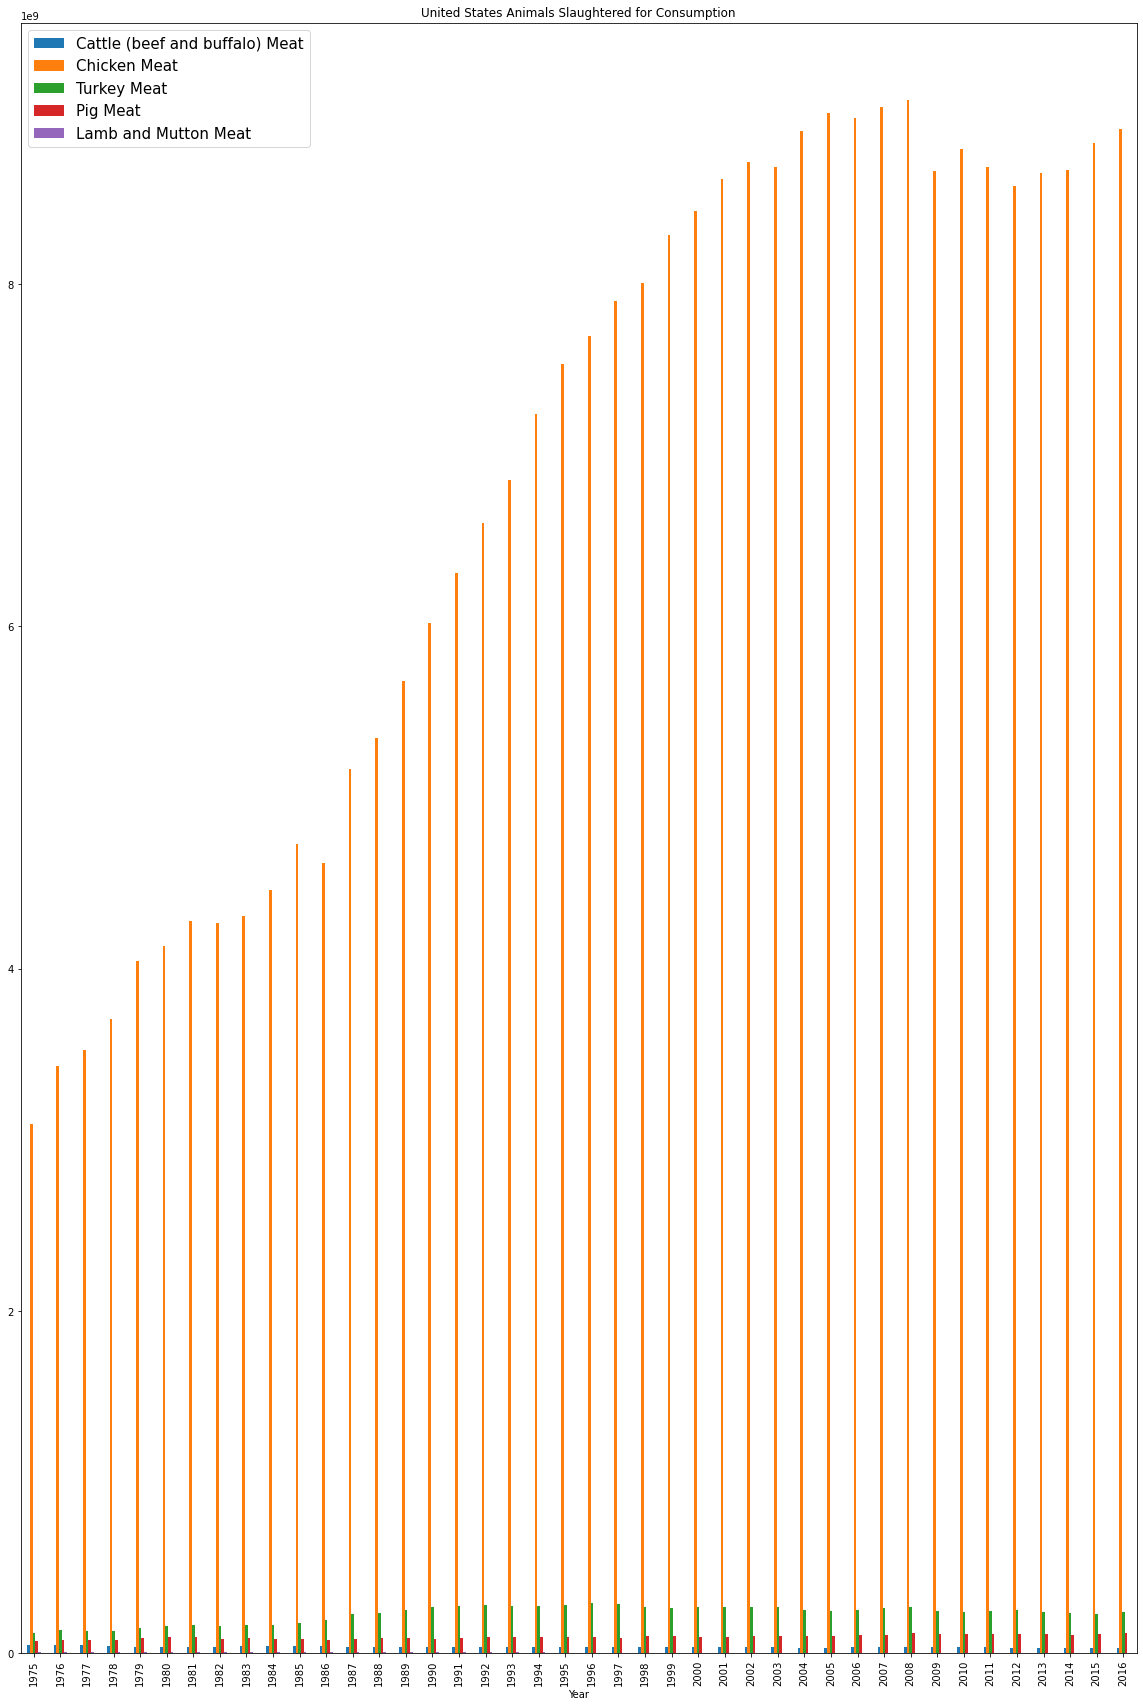

In [87]:
us_slaughtered2.plot(x='Year',
                    kind='bar',
                    stacked=False,
                    title='United States Animals Slaughtered for Consumption',
                    figsize=(20,30))
plt.legend(loc='upper left', fontsize='x-large',prop={'size':15})
plt.savefig('animals_slaughtered_total.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [13]:
global_production

,Entity,Code,Year,"Meat, game | 00001163 || Production | 005510 || tonnes","Meat, duck | 00001069 || Production | 005510 || tonnes","Meat, horse | 00001097 || Production | 005510 || tonnes","Meat, camel | 00001127 || Production | 005510 || tonnes","Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes","Meat, sheep and goat | 00001807 || Production | 005510 || tonnes","Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes","Meat, pig | 00001035 || Production | 005510 || tonnes","Meat, poultry | 00001808 || Production | 005510 || tonnes"
0,Afghanistan,AFG,1961,4000.0,NaN,NaN,3600.0,NaN,73220.0,43000.0,NaN,5600.0
1,Afghanistan,AFG,1962,4000.0,NaN,NaN,4031.0,NaN,72375.0,45800.0,NaN,6000.0
2,Afghanistan,AFG,1963,5000.0,NaN,NaN,5031.0,NaN,75530.0,47250.0,NaN,6160.0
3,Afghanistan,AFG,1964,5000.0,NaN,NaN,4680.0,NaN,79750.0,48000.0,NaN,6400.0
4,Afghanistan,AFG,1965,6000.0,NaN,NaN,4320.0,NaN,84375.0,48700.0,NaN,6800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13843,Zimbabwe,ZWE,2016,35935.0,57.0,NaN,NaN,NaN,17776.0,64805.0,23091.0,66875.0
13844,Zimbabwe,ZWE,2017,36328.0,56.0,NaN,NaN,NaN,24499.0,60138.0,11602.0,69178.0
13845,Zimbabwe,ZWE,2018,36418.0,54.0,NaN,NaN,NaN,25537.0,60619.0,9562.0,65727.0
13846,Zimbabwe,ZWE,2019,36623.0,52.0,NaN,NaN,NaN,25180.0,53560.0,10651.0,67260.0


In [14]:
global_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13848 entries, 0 to 13847
Data columns (total 12 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Entity                                                                   13848 non-null  object 
 1   Code                                                                     11269 non-null  object 
 2   Year                                                                     13848 non-null  int64  
 3   Meat, game | 00001163 || Production | 005510 || tonnes                   5694 non-null   float64
 4   Meat, duck | 00001069 || Production | 005510 || tonnes                   6903 non-null   float64
 5   Meat, horse | 00001097 || Production | 005510 || tonnes                  6687 non-null   float64
 6   Meat, camel | 00001127 || Production | 005510 || tonnes               

In [15]:
global_production.isna().sum()

Entity                                                                         0
Code                                                                        2579
Year                                                                           0
Meat, game | 00001163 || Production | 005510 || tonnes                      8154
Meat, duck | 00001069 || Production | 005510 || tonnes                      6945
Meat, horse | 00001097 || Production | 005510 || tonnes                     7161
Meat, camel | 00001127 || Production | 005510 || tonnes                    10406
Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes     9350
Meat, sheep and goat | 00001807 || Production | 005510 || tonnes             573
Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes           270
Meat, pig | 00001035 || Production | 005510 || tonnes                       1194
Meat, poultry | 00001808 || Production | 005510 || tonnes                    115
dtype: int64

In [16]:
meat_per_person = pd.read_csv('../data/meat-supply-per-person.csv')

In [17]:
meat_per_person

,Entity,Code,Year,"Meat food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1961,14.45
1,Afghanistan,AFG,1962,14.46
2,Afghanistan,AFG,1963,14.88
3,Afghanistan,AFG,1964,15.07
4,Afghanistan,AFG,1965,15.38
...,...,...,...,...
11023,Zimbabwe,ZWE,2013,18.24
11024,Zimbabwe,ZWE,2014,17.91
11025,Zimbabwe,ZWE,2015,17.81
11026,Zimbabwe,ZWE,2016,18.01


In [18]:
meat_per_person.rename(columns={'Meat food supply quantity (kg/capita/yr) (FAO, 2020)': 'kg/capita/yr'}, inplace=True)

In [19]:
meat_per_person

,Entity,Code,Year,kg/capita/yr
0,Afghanistan,AFG,1961,14.45
1,Afghanistan,AFG,1962,14.46
2,Afghanistan,AFG,1963,14.88
3,Afghanistan,AFG,1964,15.07
4,Afghanistan,AFG,1965,15.38
...,...,...,...,...
11023,Zimbabwe,ZWE,2013,18.24
11024,Zimbabwe,ZWE,2014,17.91
11025,Zimbabwe,ZWE,2015,17.81
11026,Zimbabwe,ZWE,2016,18.01


In [20]:
meat_per_person['lbs/capita/yr']=round(meat_per_person['kg/capita/yr']*2.2046,2)

### Converted kg/capita/yr to Ibs/capita/yr

In [21]:
meat_per_person

,Entity,Code,Year,kg/capita/yr,lbs/capita/yr
0,Afghanistan,AFG,1961,14.45,31.86
1,Afghanistan,AFG,1962,14.46,31.88
2,Afghanistan,AFG,1963,14.88,32.80
3,Afghanistan,AFG,1964,15.07,33.22
4,Afghanistan,AFG,1965,15.38,33.91
...,...,...,...,...,...
11023,Zimbabwe,ZWE,2013,18.24,40.21
11024,Zimbabwe,ZWE,2014,17.91,39.48
11025,Zimbabwe,ZWE,2015,17.81,39.26
11026,Zimbabwe,ZWE,2016,18.01,39.70


### Narrowed down between 1975-2016 to match BMI Dataframes.

In [22]:
mask=(meat_per_person['Year']>= 1975)&(meat_per_person['Year']<= 2016)
meat_per_person=meat_per_person[mask]
meat_per_person

,Entity,Code,Year,kg/capita/yr,lbs/capita/yr
14,Afghanistan,AFG,1975,15.77,34.77
15,Afghanistan,AFG,1976,17.37,38.29
16,Afghanistan,AFG,1977,17.57,38.73
17,Afghanistan,AFG,1978,17.76,39.15
18,Afghanistan,AFG,1979,17.71,39.04
...,...,...,...,...,...
11022,Zimbabwe,ZWE,2012,20.40,44.97
11023,Zimbabwe,ZWE,2013,18.24,40.21
11024,Zimbabwe,ZWE,2014,17.91,39.48
11025,Zimbabwe,ZWE,2015,17.81,39.26


In [23]:
avg_meat_per_person=meat_per_person.groupby('Entity')['lbs/capita/yr'].mean().reset_index()
avg_meat_per_person=pd.DataFrame(avg_meat_per_person)
avg_meat_per_person

,Entity,lbs/capita/yr
0,Afghanistan,34.901190
1,Africa,34.077692
2,Albania,65.632143
3,Algeria,36.695714
4,Americas,166.150256
...,...,...
211,World,77.434615
212,Yemen,32.193571
213,Yugoslavia,141.298235
214,Zambia,29.582857


### Showing avg meat/person by country from 1975-2016

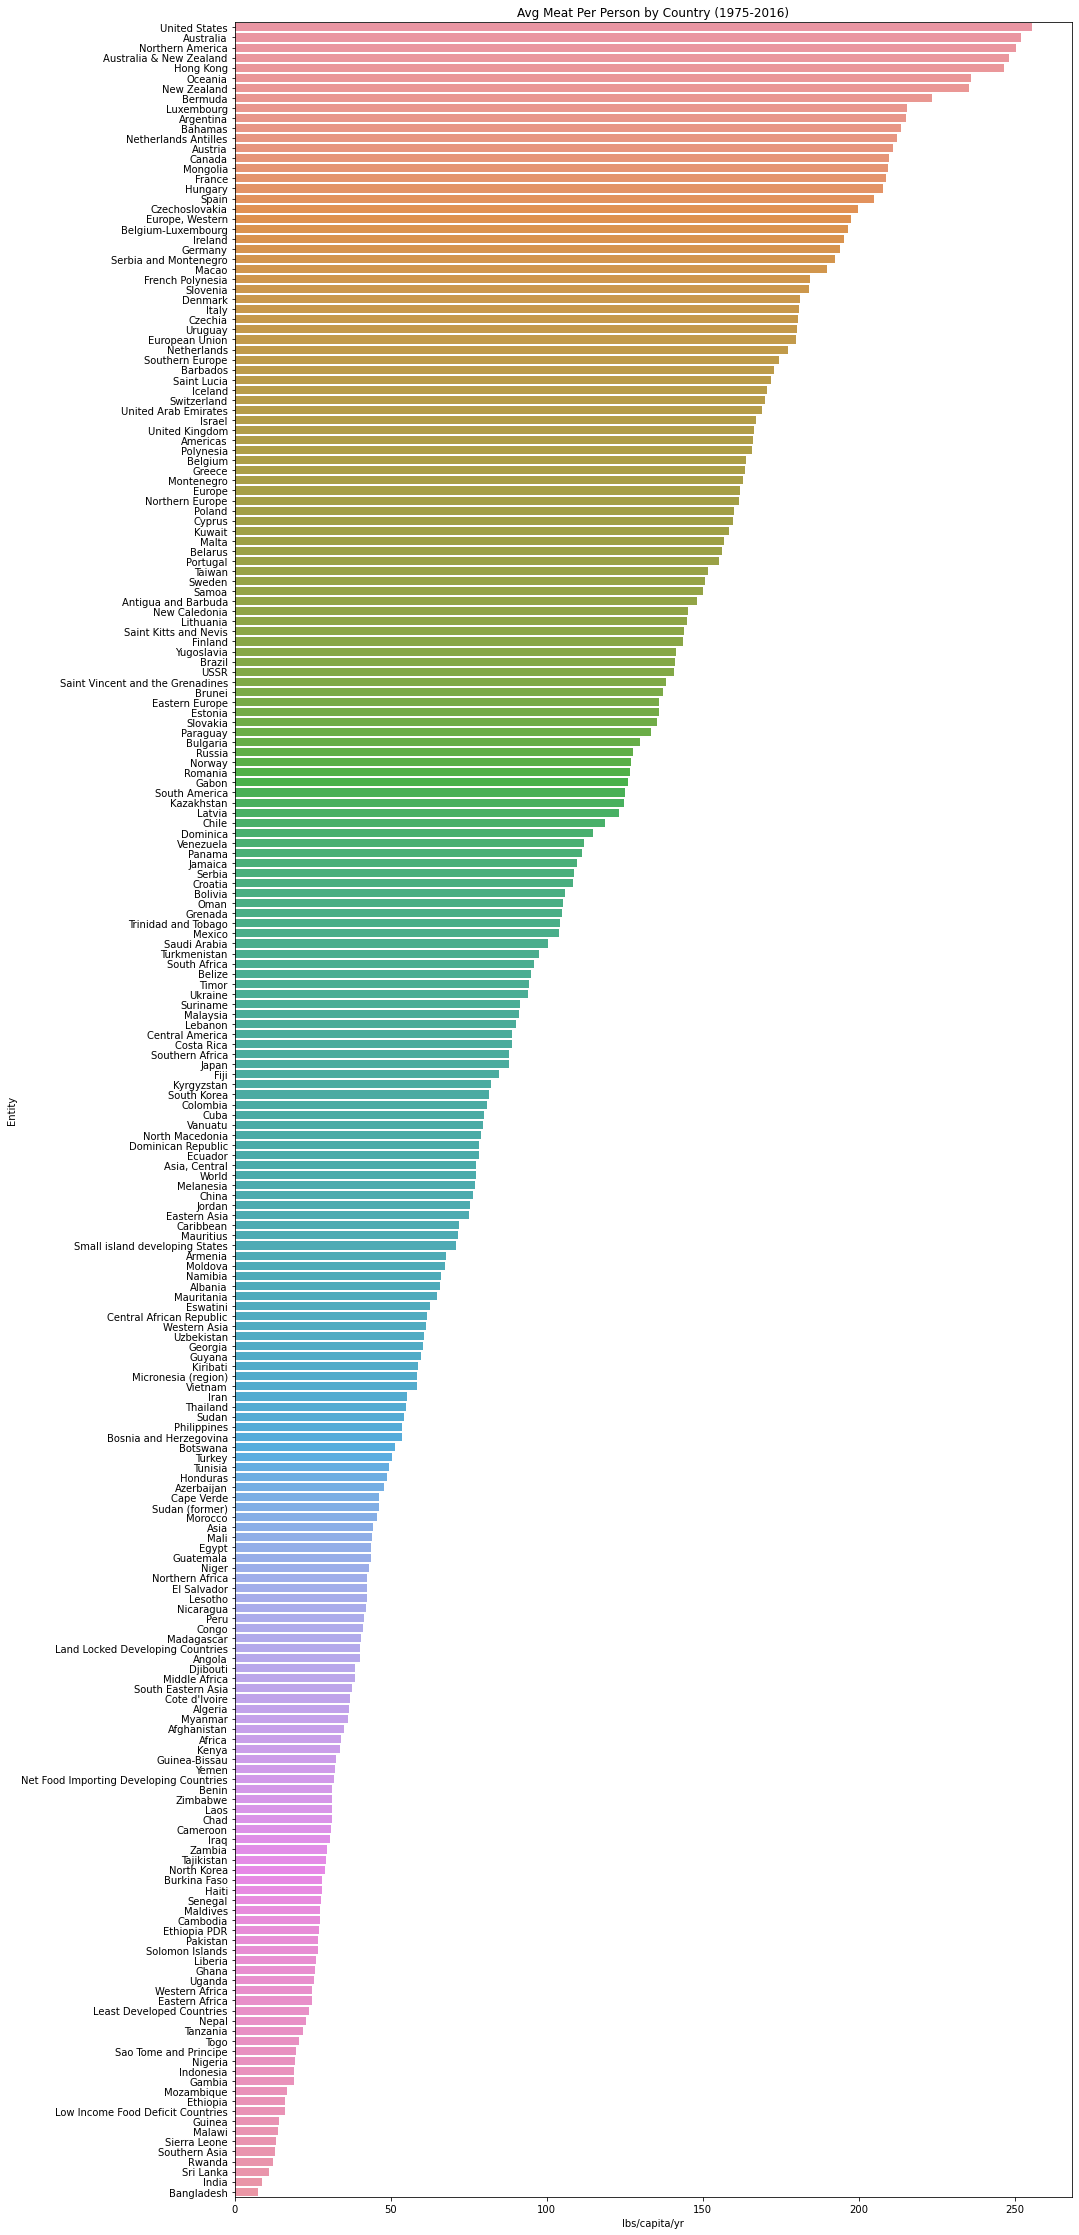

In [80]:
df=avg_meat_per_person.sort_values('lbs/capita/yr', ascending=False)
figure(num=None, figsize=(15,40), facecolor='w', edgecolor='r')
plt.title("Avg Meat Per Person by Country (1975-2016)")
sns.barplot(data=df,x='lbs/capita/yr', y='Entity')
plt.show()

### Top 10 countries - avg meat per person 

In [76]:
top_avg=avg_meat_per_person.sort_values('lbs/capita/yr',ascending=False)

In [77]:
print(top_avg[top_avg['Entity']=='Nauru'].index.values)

[]


In [41]:
top_25_avg=top_avg.head(25)
top_25_avg

,Entity,lbs/capita/yr
203,United States,255.564524
11,Australia,252.027143
144,Northern America,250.521026
12,Australia & New Zealand,248.323846
84,Hong Kong,246.601190
147,Oceania,235.875128
137,New Zealand,235.425000
23,Bermuda,223.599487
111,Luxembourg,215.475294
7,Argentina,215.243571


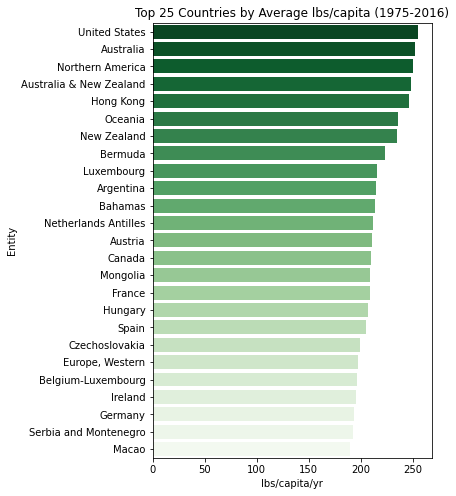

In [81]:

figure(num=None, figsize=(5,8), facecolor='w', edgecolor='r')
plt.title("Top 25 Countries by Average lbs/capita (1975-2016)")
sns.barplot(data=top_25_avg,x='lbs/capita/yr', y='Entity', palette='Greens_r')
plt.savefig('top_25.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [61]:
bottom_25=avg_meat_per_person.sort_values('lbs/capita/yr',ascending=True)
bottom_25_avg=bottom_25.head(25)
bottom_25_avg

,Entity,lbs/capita/yr
16,Bangladesh,7.391905
87,India,8.806905
182,Sri Lanka,11.082143
159,Rwanda,12.103333
179,Southern Asia,12.978462
169,Sierra Leone,13.127619
114,Malawi,13.914286
79,Guinea,14.222857
110,Low Income Food Deficit Countries,16.108718
62,Ethiopia,16.119167


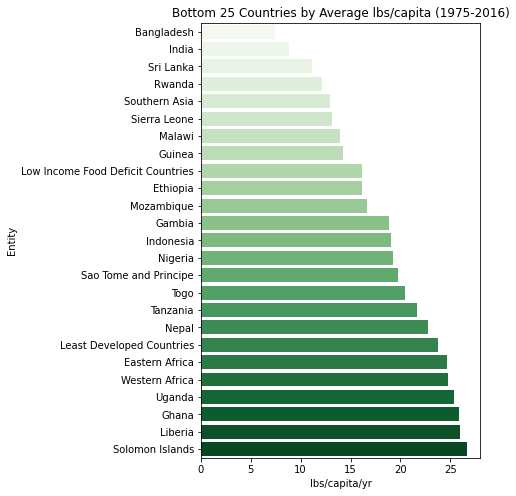

In [82]:
figure(num=None, figsize=(5,8), facecolor='w', edgecolor='r')
plt.title("Bottom 25 Countries by Average lbs/capita (1975-2016)")
sns.barplot(data=bottom_25_avg,x='lbs/capita/yr', y='Entity', palette='Greens')
plt.savefig('bottom_25.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [25]:
dp_live = pd.read_csv('../data/DP_LIVE_26102022231245819.csv')

In [26]:
dp_live.head(20)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000,NaN
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.942,NaN
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.405,NaN
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.370,NaN
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.662,NaN
5,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1995,25.526,NaN
6,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1996,27.453,NaN
7,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1997,29.000,NaN
8,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1998,26.765,NaN
9,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1999,28.095,NaN


In [27]:
dp_live.drop('Flag Codes',axis=1, inplace=True)

In [28]:
dp_live

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.942
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.405
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.370
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.662
...,...,...,...,...,...,...,...
12155,GBR,MEATCONSUMP,SHEEP,KG_CAP,A,2025,3.861
12156,GBR,MEATCONSUMP,SHEEP,KG_CAP,A,2026,3.847
12157,GBR,MEATCONSUMP,SHEEP,KG_CAP,A,2027,3.836
12158,GBR,MEATCONSUMP,SHEEP,KG_CAP,A,2028,3.826
